In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Zad 1 

In [3]:
def Jacobi(A,b,x0,eps,sol):
    n = A.shape[0]
    x = x0.copy()
    x1 = np.zeros_like(x0, dtype=np.double)
    it = []
    err = []
    step = 0
    while not np.allclose(x, sol, atol = eps):
        for i in range(n):
            x1[i] = b[i]
            for j in range(n):
                if j == i :
                    continue
                x1[i] -= A[i][j] * x[j]
            x1[i] /= A[i][i]
        x = x1.copy()
        step += 1
        err.append(np.linalg.norm(b - A.dot(x)))
        it.append(step)
    print(f"Liczba iteracji: {step}")
    plt.plot(it, err)
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Błąd")
    plt.show()
    return x

In [29]:
def GaussSeidel(A,b, x0, eps, sol):
    n = A.shape[0]
    x = x0.copy()
    
    it = []
    err = []
    step = 0
    while not np.allclose(x, sol, atol = eps):
        for i in range(n):
            x[i] = b[i]
            for j in range(n):
                if j == i :
                    continue
                x[i] -= A[i][j] * x[j]
            x[i] /= A[i][i]
        step += 1
        err.append(np.linalg.norm(b - A.dot(x)))
        it.append(step)
    print(f"Liczba iteracji: {step}")
    plt.plot(it, err)
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Błąd")
    plt.show()
    return x

In [30]:
def SOR(A,b,x0, eps, w, sol):
    n = A.shape[0]
    x = x0.copy()
    x1 = x0.copy()
    it = []
    err = []
    step = 0
    
    while not np.allclose(x, sol, atol = eps):
        for i in range(n):
            x1[i] = b[i]
            for j in range(n):
                if j == i :
                    continue
                x1[i] -= A[i][j] * x[j]
            x1[i] /= A[i][i]
            x[i] = x[i]*(1-w) + w * x1[i]
        step += 1
        err.append(np.linalg.norm(b - A.dot(x)))
        it.append(step)
    print(f"Liczba iteracji: {step}")
    plt.plot(it, err)
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Błąd")
    plt.show()
    return x

In [31]:
x0 = np.array([[1.],[0.],[0.], [0.]])

Rozwiązanie: 
[[1.0], [-1.0], [1.0], [-1.0]]
 
Metoda Jacobiego: 
Liczba iteracji: 13


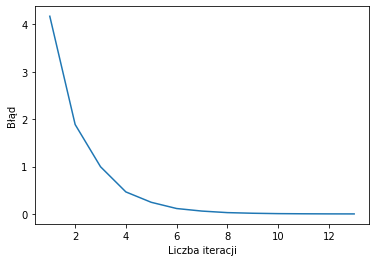

[[ 0.99989203]
 [-0.99991994]
 [ 1.00006174]
 [-0.99996698]]


Metoda Gaussa-Siedla: 
Liczba iteracji: 7


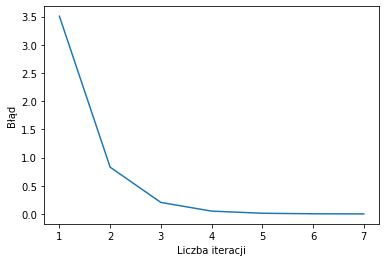

[[ 0.99989203]
 [-0.99991255]
 [ 1.00004696]
 [-0.99992703]]


Metda SOR: 
Liczba iteracji: 5


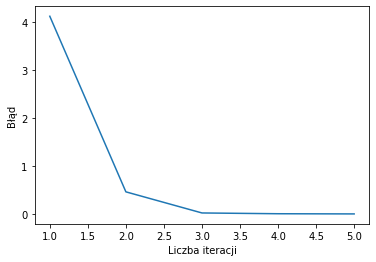

[[ 1.00004443]
 [-1.0000314 ]
 [ 0.99996072]
 [-1.00001372]]




In [43]:
A1 = np.array([[ 7.,  1., -1., 2.],
              [ 1.,  8.,  0., -2.],
              [-1.,  0.,  4., -1.],
              [2., -2., -1., 6.]])

b1 = np.array([[3.],[-5.],[4.],[-3.]])

sol = [[1.],[-1.],[1.],[-1.]]
print(f"Rozwiązanie: \n{sol}\n ")
print("Metoda Jacobiego: ")
print(Jacobi(A1, b1, x0, 1e-4, sol))
print('\n')
print("Metoda Gaussa-Siedla: ")
print(GaussSeidel(A1, b1, x0, 1e-4, sol))
print('\n')
print("Metda SOR: ")
print(SOR(A1, b1, x0, 1e-4, 1.1, sol))
print('\n')

Rozwiązanie: 
[[-1.0], [1.0], [-1.0], [1.0]] 

Metoda Jacobiego: 
Liczba iteracji: 73


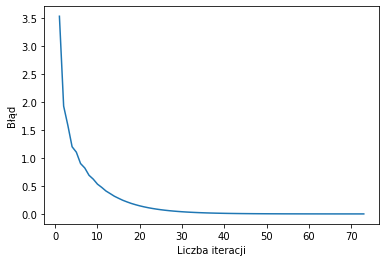

[[-0.99991768]
 [ 0.99990508]
 [-0.99997776]
 [ 0.9999008 ]]


Metoda Gaussa-Siedla: 
Liczba iteracji: 36


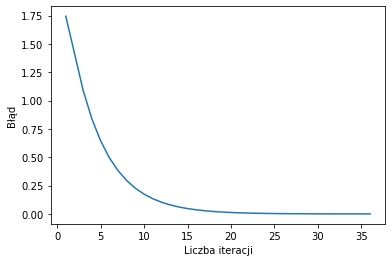

[[-0.99990588]
 [ 0.99990014]
 [-0.99998236]
 [ 0.999905  ]]


Metda SOR: 
Liczba iteracji: 11


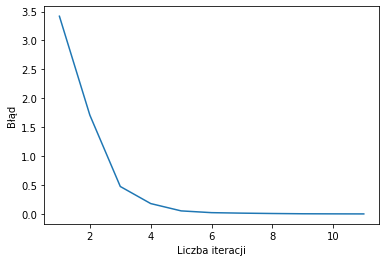

[[-0.99998223]
 [ 1.00003321]
 [-0.99993515]
 [ 1.00001498]]




In [33]:
A2 = np.array([[ 7.,  3., -1., 2.],
              [ 3.,  8.,  1., -4.],
              [-1.,  1.,  4., -1.],
              [2., -4., -1., 6.]])
b2 = np.array([[-1.],[0.],[-3.],[1.]])
sol = [[-1.],[1.],[-1.],[1.]]
# sol = np.linalg.solve(A2,b2)
print(f"Rozwiązanie: \n{sol} \n")
print("Metoda Jacobiego: ")
print(Jacobi(A2, b2, x0,1e-4,sol))
print("\n")
print("Metoda Gaussa-Siedla: ")
print(GaussSeidel(A2, b2, x0, 1e-4, sol))
print('\n')
print("Metda SOR: ")
print(SOR(A2, b2, x0, 1e-4, 1.4, sol))
print('\n')

Metoda Jacobiego jest najbardziej intuicyjna, jednak przekłada się to na jakość algorytmu. Metoda Gaussa-Seidla jest lepsza, ponieważ podczas iterowania cały czas korzystamy z nowszych przybliżeń (a nie jak w metodzie Jacobiego czekamy do końca pełnej iteracji z uaktualnieniem naszego rozwiązania) i to widać w liczbie wykonywanych kroków przy tych metodach. Metoda SOR jest jeszcze lepsza i potrzebuje jeszcze mniej kroków do podania prawidłowego wyniku, szczególnie przy odpowiednim wyborze parametru omega (co udowadnia mała liczba kroków w 1. i 2. układzie przy wykorzystaniu tej metody).

Metody iteracyjne rozwiązywania układów równań to bardzo efektywny i wartościowy zamiennik metod dokładnych. W wielu przypadkach może okazać się znacznie szybsze, szczególnie gdy interesuje nas tylko przybliżenie, a nie dokładne rozwiązanie. Jednak ich działanie nie zawsze się sprawdza lub wymagają wielu iteracji jak w przykładzie drugim, gdzie metody Jacobiego i Gaussa-Seidla wykonały prawie 40 iteracji. Co więcej, nie zawsze muszą być zbieżne - należy sprawdzić, czy macierze posiadają wymagane właściwości (np. czy jest dominująca przekątniowo dla metod Jacobiego i Gaussa-Seidla).

# Zad 2

a) W funkcji "graph" tworzę dwa grafy. Pierwszy jest grafem z wagami na krawędziach i tego grafu będę używać w dalszych obliczeniach. Drugi graf natomiast stworzyłam bez wag i go używam do wizualizacji.

In [34]:
def graph(edges, s, t, e, draw = True):
    G1 = nx.Graph()
    G1.add_weighted_edges_from(edges)
    G1[s][t]['weight'] = e
    if draw:
        G = nx.Graph()
        edges_without_weights = [el[:-1] for el in edges]
        G.add_edges_from(edges_without_weights)
        pos = nx.spring_layout(G)
#         edge_labels = dict([((i,j), G[i][j]['weight']) for i,j in G.edges])
        nx.draw(G, pos, with_labels = True)
#         nx.draw_networkx_edge_labels(G ,pos, edge_labels=edge_labels, font_color = 'red')
    return G1

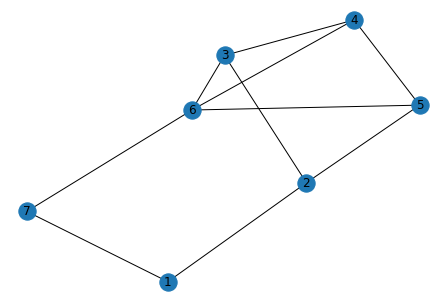

In [35]:
edges = [(1, 2, 7), (3, 2, 5), (3,6,11), (6, 5, 6), (5, 2, 5), (5, 4, 4),  (4, 3, 1),(4, 6, 9), (7, 1, 0), (7, 6, 0)]
G = graph(edges, 1, 7, 300)

b) Funkcja solve oprócz grafu, przyjmuje trójkę (s,t,E), która spełnia taką samą funkcję, jak w zadaniu powyżej. Próbowałam uzywać funkcji nx.cycle_basis, która w dokumentacji jest opisana jako odpowiednia przy tego typu zadaniach.  Jednak nie umiałam na jej podstawie ułozyć odpowiedniego układu równań. Na samym dole znajduje się funkcja find, która uwzględnia kierunek prądu w oczkach, jednak nie byłam pewna, jak go ustalać, dlatego poniższa funkcja przyjmuje, że kierunek wyznacza po prostu kolejność wierzchołków. Dla tego przypadku to działa, ale funkcja solve przyjmuje argument będący listą cykli, takich samych jak na rysunku i na ich podstawie tworzę układ i go rozwiązuje.

In [36]:
def solve(G, s, t, E, cycles):

    n = len(cycles)
    #kazdy cykl to osobna zmienna
    A = np.zeros((n, n))
    b = np.zeros((n, 1))
    
    for idx, cycle in enumerate(cycles):
        sum_idx = 0
        cycle_len = len(cycle)
        edges = find_edges(cycle)
        
        for edge in edges:
            value = G[edge[0]][edge[1]]['weight'] 
            sum_idx += value
            direction, index = find(cycles, idx, edge)  #wersja z funkcja ktora uwzglednia kierunek
            if (index >=0):
                A[idx][index] = direction * value
        A[idx][idx] = sum_idx
        if source(edges, s, t):
            b[idx] = E
            A[idx][idx]-=E
    print(A)
    print(b)
    
    return A, b

#znajduje krawędzie pomiędzy wierzchołkami cyklu
def find_edges(nodes):
    edges = []
    for i in range(len(nodes)-1):
        edges.append((nodes[i],nodes[i+1]))
    edges.append((nodes[len(nodes)-1],nodes[0]))
    return edges

#funkcja ktora sprawdza czy krawedz posiada źródło prądu
def source(edges, s, t):
    if (s,t) in edges or (t,s) in edges:
        return True
    return False

# #szuka krawedzi w innym cyklu - wersja podstawowa
# def find(cycles, idx, edge):
#     index = -1
#     for i in range(len(cycles)):
#         if edge[0] in cycles[i] and edge[1] in cycles[i]:
#             if i==idx:
#                 continue
#             else: 
#                 return i
#     return index

#wersja funkcji find uwzgledniajaca kierunek prądu w oczku 
#kierunek ustalany jest na podstawie tego, jak cykl jest zapisany (kolejność wierzchołków)  
#kiedy prąd w oczku ma kierunek zgodny z prądem w oczku, z którym "dzieli" krawędź wartość opornika jest dodwana
#w przeciwnym przypadku wartość jest odejmowana odejmowana
def find(cycles, idx, edge):
    index = -1
    direction = 0
    for i in range(len(cycles)):
        if edge[0] in cycles[i] and edge[1] in cycles[i]:
            if i==idx:
                continue
            else:
                n = len(cycles[i])
                if cycles[i][n-1] == edge[0] and cycles[i][0] == edge[1]:
                    direction = 1
                    return direction, i
                for j in range(n-1):
                    if cycles[i][j] == edge[0] and cycles[i][j+1] == edge[1]:
                        direction = 1
                        return direction, i  
                direction = -1
                return direction, i
    return direction, index
        

In [37]:
edges = [(1, 2, 7), (3, 2, 5), (3, 6, 11), (6, 5, 6), (5, 2, 2), (5, 4, 4),  (4, 3, 1), (4, 6, 9), (7, 1, 0), (7, 6, 0)]
G = graph(edges, 1, 7, 300, False)

# cycles = nx.cycle_basis(G)
cycles = [[1, 2, 5, 6, 7],  [2, 3, 4, 5], [5,4,6], [6, 4, 3]]

A, b = solve(G, 7, 1, 300, cycles)
solution = [26.5, 9.35, 13.3, 6.13]
# print(GaussSeidel(A, b, x0, 1e-4, solution))
# print(Jacobi(A, b, x0, 1e-4, solution))
# print(SOR(A, b, x0, 1e-4, 1.4, solution))

print(np.linalg.solve(A,b))

[[15. -2. -6.  0.]
 [-2. 12. -4. -1.]
 [-6. -4. 19. -9.]
 [ 0. -1. -9. 21.]]
[[300.]
 [  0.]
 [  0.]
 [  0.]]
[[26.54915785]
 [ 9.35370153]
 [13.25499412]
 [ 6.12612613]]


Macierz A nie jest dominująca przekątniowo, co może powodować, ze metody Jacobiego i Gaussa Seidla nie są zbieżne - tak jest w tym przypadku. Metoda SOR również nie działa.

f)

Dwa spójne losowe grafy połączone mostem:


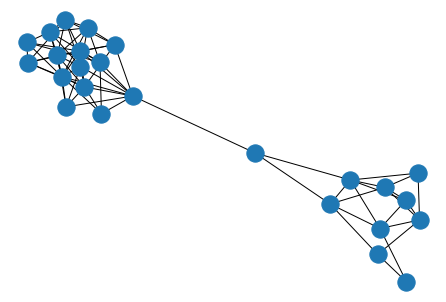

In [38]:
print("Dwa spójne losowe grafy połączone mostem:")
A1 = nx.erdos_renyi_graph(15, 0.5)
A2 = nx.erdos_renyi_graph(10, 0.5)
A = nx.union(A1, A2, rename=('a1-', 'b1-'))
A.add_edge('a1-0', 'b1-0')
if len((list(nx.connected_components(A)))) == 1:
    nx.draw(A)

Graf kubiczny o 16 wierzchołkach:


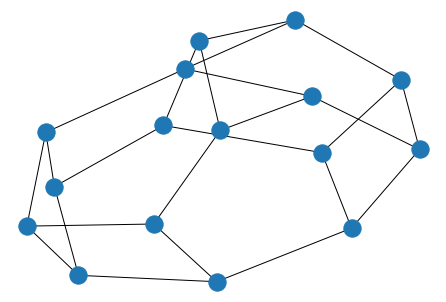

In [39]:
print("Graf kubiczny o 16 wierzchołkach:")
B = nx.random_regular_graph(3,16)
nx.draw(B) 

Spójny graf losowy:


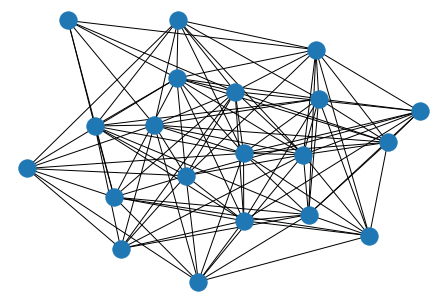

In [40]:
print("Spójny graf losowy:")
C = nx.erdos_renyi_graph(20, 0.5)
if len((list(nx.connected_components(A)))) == 1:
    nx.draw(C)

Siatka 2D: 


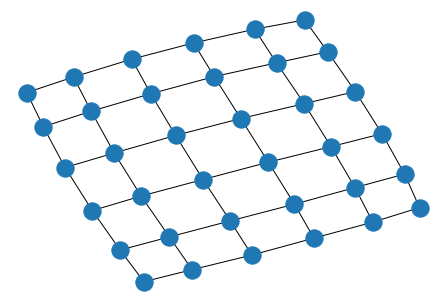

In [42]:
print("Siatka 2D: ")
D= nx.grid_graph([6,6])
nx.draw(D)